<a href="https://colab.research.google.com/github/priyanshu2103/NJW-Incremental/blob/main/Final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install libeigen3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libeigen3-doc libmrpt-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 810 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeigen3-dev all 3.3.4-4 [810 kB]
Fetched 810 kB in 1s (1,144 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libeigen3

In [2]:
!git clone https://github.com/priyanshu2103/NJW-Incremental.git

Cloning into 'NJW-Incremental'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 102 (delta 12), reused 0 (delta 0), pack-reused 80
Receiving objects: 100% (102/102), 1.78 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd NJW-Incremental

/content/NJW-Incremental


In [4]:
from sklearn.utils.linear_assignment_ import linear_assignment

def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [5]:
def convert(ip):
    with open(ip, 'r') as f:
        lines = [' '.join(x.replace('\n', '').split()[:-1]) for x in f.readlines()]

    with open('ip_' + ip, 'w') as f:
        for line in lines:
            f.write(line + '\n')

In [6]:
def plot(k, file):
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns

    # Before clustering
    # df = pd.read_csv("mall_data.csv", header=None)
    # df.columns = ["Annual income (k$)", "Spending Score (1-100)"]
    # sns.scatterplot(x=df["Annual income (k$)"], 
    #                 y=df["Spending Score (1-100)"])
    # plt.title("Scatterplot of spending (y) vs income (x)")

    # After clustering
    plt.figure()
    df = pd.read_csv(file)
    sns.scatterplot(x=df.x, y=df.y, 
                    hue=df.c, 
                    palette=sns.color_palette("hls", n_colors=k))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Clustered: y vs x")

    plt.show()

In [7]:
import numpy as np

def accuracy(infile, outfile):
    input_labels = []
    pred_labels = []
    with open(outfile, 'r') as f:
        pred_labels = [x.replace('\n', '').split(',')[2] for x in f.readlines()[1:]]
    with open(infile, 'r') as f:
        input_labels = [x.replace('\n', '').split(',')[2] for x in f.readlines()[1:]]
        #input_labels = [x.replace('\n', '').split()[-1] for x in f.readlines()]

    print(cluster_acc(np.array(input_labels, dtype=int), np.array(pred_labels, dtype=int)))

In [8]:
!wget -c http://cs.uef.fi/sipu/datasets/jain.txt

--2021-04-09 09:50:23--  http://cs.uef.fi/sipu/datasets/jain.txt
Resolving cs.uef.fi (cs.uef.fi)... 193.167.239.10
Connecting to cs.uef.fi (cs.uef.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4933 (4.8K) [text/plain]
Saving to: ‘jain.txt’

jain.txt            100%[===================>]   4.82K  --.-KB/s    in 0s      

2021-04-09 09:50:24 (513 MB/s) - ‘jain.txt’ saved [4933/4933]



In [9]:
convert('jain.txt')

In [13]:
!g++ njw_final.cpp -O3

In [14]:
!./a.out ip_jain.txt 2 1 update 5 6 16


Data fetched successfully!

Eigen values are: 
0.998805 0.999646 1 0.996184 0.989039 0.987116 0.976901 0.97282 0.956872 0.942327 0.94565 0.933829 0.922262 0.922634 0.873398 0.894904 0.878904 -0.880879 0.824081 0.829014 0.809886 0.77137 0.76115 0.754052 0.695089 0.692931 0.649379 0.66633 0.63715 -0.698823 0.619227 0.602783 0.590078 0.588793 -0.662939 0.579523 -0.647248 0.564456 0.541035 0.52909 0.533045 0.507548 0.496921 0.486049 0.490412 -0.587065 0.47559 0.47238 -0.570594 -0.574426 0.437496 0.429242 0.40587 0.381374 0.375971 -0.514698 0.357761 0.3526 0.342405 0.33694 0.320112 -0.475044 -0.465938 -0.4715 -0.462967 -0.461031 0.312276 -0.455261 -0.437797 0.285659 -0.428983 0.266252 -0.420099 0.261833 -0.4273 0.255032 -0.395915 0.220772 0.232606 0.205917 -0.374921 0.20864 -0.374834 -0.36826 0.203227 -0.356358 0.186977 0.187517 -0.347873 0.179196 0.175838 -0.330565 -0.328693 0.146541 0.147949 -0.315105 -0.314891 0.138433 0.134835 -0.304148 0.127042 0.115687 -0.290888 -0.287257 -0.283175 0

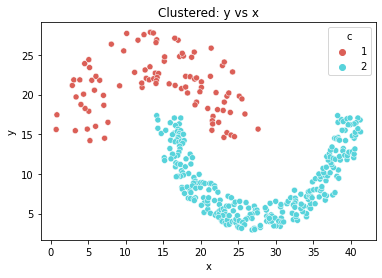

In [15]:
plot(2, "update_1_ip_jain.txt_output.csv")

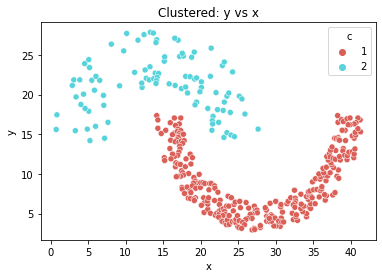

In [16]:
plot(2, "static_new_update_ip_jain.txt_output.csv")

In [17]:
accuracy("static_new_update_ip_jain.txt_output.csv", "update_1_ip_jain.txt_output.csv")

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [18]:
!./a.out ip_jain.txt 2 1 insert 6 16 


Data fetched successfully!

Eigen values are: 
0.998805 0.999646 1 0.996184 0.989039 0.987116 0.976901 0.97282 0.956872 0.942327 0.94565 0.933829 0.922262 0.922634 0.873398 0.894904 0.878904 -0.880879 0.824081 0.829014 0.809886 0.77137 0.76115 0.754052 0.695089 0.692931 0.649379 0.66633 0.63715 -0.698823 0.619227 0.602783 0.590078 0.588793 -0.662939 0.579523 -0.647248 0.564456 0.541035 0.52909 0.533045 0.507548 0.496921 0.486049 0.490412 -0.587065 0.47559 0.47238 -0.570594 -0.574426 0.437496 0.429242 0.40587 0.381374 0.375971 -0.514698 0.357761 0.3526 0.342405 0.33694 0.320112 -0.475044 -0.465938 -0.4715 -0.462967 -0.461031 0.312276 -0.455261 -0.437797 0.285659 -0.428983 0.266252 -0.420099 0.261833 -0.4273 0.255032 -0.395915 0.220772 0.232606 0.205917 -0.374921 0.20864 -0.374834 -0.36826 0.203227 -0.356358 0.186977 0.187517 -0.347873 0.179196 0.175838 -0.330565 -0.328693 0.146541 0.147949 -0.315105 -0.314891 0.138433 0.134835 -0.304148 0.127042 0.115687 -0.290888 -0.287257 -0.283175 0

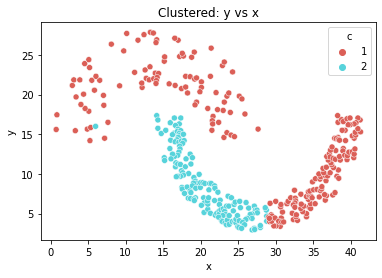

In [19]:
plot(2, "insert_1_ip_jain.txt_output.csv")

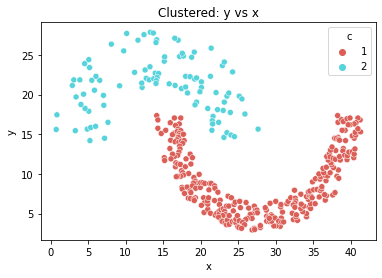

In [20]:
plot(2, "static_new_insert_ip_jain.txt_output.csv")

In [21]:
accuracy("static_new_insert_ip_jain.txt_output.csv", "insert_1_ip_jain.txt_output.csv")

0.6577540106951871


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [22]:
!./a.out ip_jain.txt 2 1 remove 5


Data fetched successfully!

Eigen values are: 
0.998805 0.999646 1 0.996184 0.989039 0.987116 0.976901 0.97282 0.956872 0.942327 0.94565 0.933829 0.922262 0.922634 0.873398 0.894904 0.878904 -0.880879 0.824081 0.829014 0.809886 0.77137 0.76115 0.754052 0.695089 0.692931 0.649379 0.66633 0.63715 -0.698823 0.619227 0.602783 0.590078 0.588793 -0.662939 0.579523 -0.647248 0.564456 0.541035 0.52909 0.533045 0.507548 0.496921 0.486049 0.490412 -0.587065 0.47559 0.47238 -0.570594 -0.574426 0.437496 0.429242 0.40587 0.381374 0.375971 -0.514698 0.357761 0.3526 0.342405 0.33694 0.320112 -0.475044 -0.465938 -0.4715 -0.462967 -0.461031 0.312276 -0.455261 -0.437797 0.285659 -0.428983 0.266252 -0.420099 0.261833 -0.4273 0.255032 -0.395915 0.220772 0.232606 0.205917 -0.374921 0.20864 -0.374834 -0.36826 0.203227 -0.356358 0.186977 0.187517 -0.347873 0.179196 0.175838 -0.330565 -0.328693 0.146541 0.147949 -0.315105 -0.314891 0.138433 0.134835 -0.304148 0.127042 0.115687 -0.290888 -0.287257 -0.283175 0

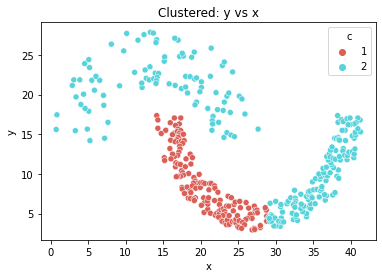

In [23]:
plot(2, "remove_1_ip_jain.txt_output.csv")

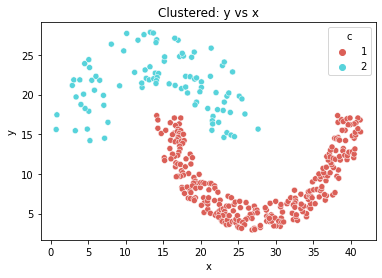

In [24]:
plot(2, "static_new_remove_ip_jain.txt_output.csv")

In [25]:
accuracy("static_new_remove_ip_jain.txt_output.csv", "remove_1_ip_jain.txt_output.csv")

0.6586021505376344


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [26]:
!wget -c http://cs.uef.fi/sipu/datasets/flame.txt

--2021-04-09 10:06:04--  http://cs.uef.fi/sipu/datasets/flame.txt
Resolving cs.uef.fi (cs.uef.fi)... 193.167.239.10
Connecting to cs.uef.fi (cs.uef.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127 (3.1K) [text/plain]
Saving to: ‘flame.txt’

flame.txt           100%[===================>]   3.05K  --.-KB/s    in 0s      

2021-04-09 10:06:04 (564 MB/s) - ‘flame.txt’ saved [3127/3127]



In [27]:
convert('flame.txt')

In [28]:
!./a.out ip_flame.txt 2 1 update 0 8 29


Data fetched successfully!

Eigen values are: 
-0.888826 1 0.981066 0.966472 0.939047 0.890391 0.796978 0.837068 0.771292 0.738235 0.657337 0.633585 0.565157 0.537611 0.503122 0.515916 0.438921 0.48102 0.410909 0.378416 0.349564 0.335303 0.303523 0.292673 0.286469 0.27078 0.256705 0.235988 0.22148 0.214457 0.192941 0.174872 0.158536 0.1493 0.137526 0.125193 0.115481 0.112513 0.0910778 0.0860586 0.0856448 -0.209939 0.070956 0.0653637 0.0574489 0.0469441 -0.184541 -0.179675 0.0286832 -0.178989 0.0281692 0.0202942 0.0196844 -0.168711 0.0123967 0.00149331 -6.02992e-05 -0.00144565 -0.0041563 -0.0103918 -0.153917 -0.0156982 -0.153178 -0.152942 -0.14997 -0.149108 -0.0201552 -0.148534 -0.0213106 -0.146042 -0.144639 -0.143021 -0.0268311 -0.0280181 -0.138793 -0.0323605 -0.138581 -0.136757 -0.135545 -0.134948 -0.134137 -0.0365043 -0.1323 -0.131675 -0.130111 -0.0394996 -0.128249 -0.127552 -0.126452 -0.0427332 -0.123997 -0.12292 -0.122719 -0.0451624 -0.122152 -0.121987 -0.0458365 -0.119253 -0.0482

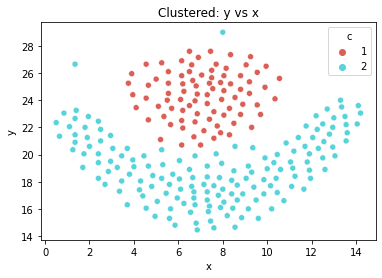

In [29]:
plot(2, "update_1_ip_flame.txt_output.csv")

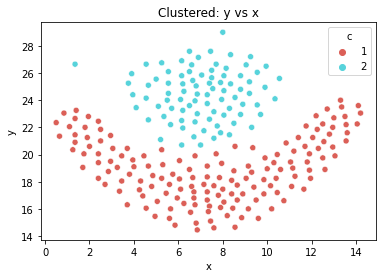

In [30]:
plot(2, "static_new_update_ip_flame.txt_output.csv")

In [31]:
accuracy("static_new_update_ip_flame.txt_output.csv", "update_1_ip_flame.txt_output.csv")

0.9916666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [32]:
!./a.out ip_flame.txt 2 1 insert 8 29


Data fetched successfully!

Eigen values are: 
-0.888826 1 0.981066 0.966472 0.939047 0.890391 0.796978 0.837068 0.771292 0.738235 0.657337 0.633585 0.565157 0.537611 0.503122 0.515916 0.438921 0.48102 0.410909 0.378416 0.349564 0.335303 0.303523 0.292673 0.286469 0.27078 0.256705 0.235988 0.22148 0.214457 0.192941 0.174872 0.158536 0.1493 0.137526 0.125193 0.115481 0.112513 0.0910778 0.0860586 0.0856448 -0.209939 0.070956 0.0653637 0.0574489 0.0469441 -0.184541 -0.179675 0.0286832 -0.178989 0.0281692 0.0202942 0.0196844 -0.168711 0.0123967 0.00149331 -6.02992e-05 -0.00144565 -0.0041563 -0.0103918 -0.153917 -0.0156982 -0.153178 -0.152942 -0.14997 -0.149108 -0.0201552 -0.148534 -0.0213106 -0.146042 -0.144639 -0.143021 -0.0268311 -0.0280181 -0.138793 -0.0323605 -0.138581 -0.136757 -0.135545 -0.134948 -0.134137 -0.0365043 -0.1323 -0.131675 -0.130111 -0.0394996 -0.128249 -0.127552 -0.126452 -0.0427332 -0.123997 -0.12292 -0.122719 -0.0451624 -0.122152 -0.121987 -0.0458365 -0.119253 -0.0482

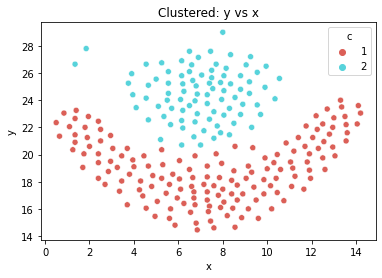

In [33]:
plot(2, "insert_1_ip_flame.txt_output.csv")

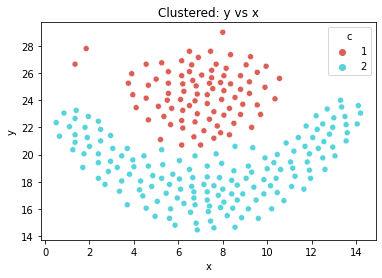

In [34]:
plot(2, "static_new_insert_ip_flame.txt_output.csv")

In [35]:
accuracy("static_new_insert_ip_flame.txt_output.csv", "insert_1_ip_flame.txt_output.csv")

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [36]:
!./a.out ip_flame.txt 2 1 remove 0


Data fetched successfully!

Eigen values are: 
-0.888826 1 0.981066 0.966472 0.939047 0.890391 0.796978 0.837068 0.771292 0.738235 0.657337 0.633585 0.565157 0.537611 0.503122 0.515916 0.438921 0.48102 0.410909 0.378416 0.349564 0.335303 0.303523 0.292673 0.286469 0.27078 0.256705 0.235988 0.22148 0.214457 0.192941 0.174872 0.158536 0.1493 0.137526 0.125193 0.115481 0.112513 0.0910778 0.0860586 0.0856448 -0.209939 0.070956 0.0653637 0.0574489 0.0469441 -0.184541 -0.179675 0.0286832 -0.178989 0.0281692 0.0202942 0.0196844 -0.168711 0.0123967 0.00149331 -6.02992e-05 -0.00144565 -0.0041563 -0.0103918 -0.153917 -0.0156982 -0.153178 -0.152942 -0.14997 -0.149108 -0.0201552 -0.148534 -0.0213106 -0.146042 -0.144639 -0.143021 -0.0268311 -0.0280181 -0.138793 -0.0323605 -0.138581 -0.136757 -0.135545 -0.134948 -0.134137 -0.0365043 -0.1323 -0.131675 -0.130111 -0.0394996 -0.128249 -0.127552 -0.126452 -0.0427332 -0.123997 -0.12292 -0.122719 -0.0451624 -0.122152 -0.121987 -0.0458365 -0.119253 -0.0482

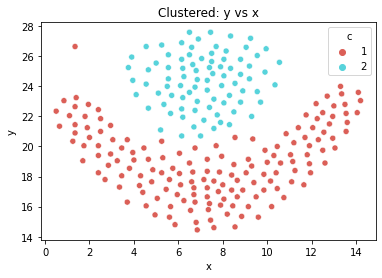

In [37]:
plot(2, "remove_1_ip_flame.txt_output.csv")

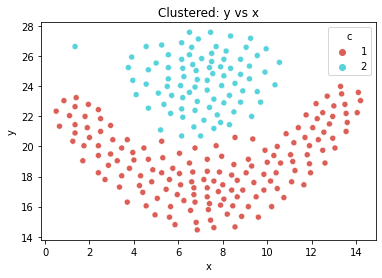

In [38]:
plot(2, "static_new_remove_ip_flame.txt_output.csv")

In [39]:
accuracy("static_new_remove_ip_flame.txt_output.csv", "remove_1_ip_flame.txt_output.csv")

0.99581589958159


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [40]:
!wget -c http://cs.uef.fi/sipu/datasets/spiral.txt

--2021-04-09 10:08:18--  http://cs.uef.fi/sipu/datasets/spiral.txt
Resolving cs.uef.fi (cs.uef.fi)... 193.167.239.10
Connecting to cs.uef.fi (cs.uef.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4200 (4.1K) [text/plain]
Saving to: ‘spiral.txt’

spiral.txt          100%[===================>]   4.10K  --.-KB/s    in 0s      

2021-04-09 10:08:19 (521 MB/s) - ‘spiral.txt’ saved [4200/4200]



In [41]:
convert('spiral.txt')

In [42]:
!./a.out ip_spiral.txt 3 1 update 0 33 9 


Data fetched successfully!

Eigen values are: 
1 0.999296 0.999314 0.998172 0.997944 0.997853 0.991623 0.993005 0.992761 0.984074 0.983539 0.98241 0.97095 0.97018 0.969447 0.953395 0.952882 0.95421 0.934853 0.932986 0.932602 0.911954 0.907803 0.909274 0.883266 0.883125 0.882135 0.856556 0.854305 0.85515 0.824217 0.823728 0.818216 0.785237 0.786667 0.783441 0.753266 0.749426 0.744315 0.713892 0.71418 0.704755 0.676164 0.667945 0.666168 0.630897 0.636097 0.61577 0.592328 0.599914 0.586411 0.55077 0.544233 0.537782 0.510465 0.507512 0.489934 0.453087 0.460269 0.457012 0.425845 0.426717 -0.676662 0.414598 0.368189 0.377239 0.374781 -0.697668 0.326735 0.334225 0.330854 0.292981 0.288679 0.288333 -0.625082 0.258229 -0.592181 0.242941 0.237181 -0.584112 0.21009 0.212538 -0.566316 0.202526 0.182221 -0.548864 -0.557721 -0.556227 0.167695 0.165054 -0.538354 -0.524897 -0.533815 0.141724 0.140304 -0.520064 0.138019 -0.504361 -0.50838 -0.503173 -0.499975 0.101811 0.101 0.100067 -0.484898 -0.485241

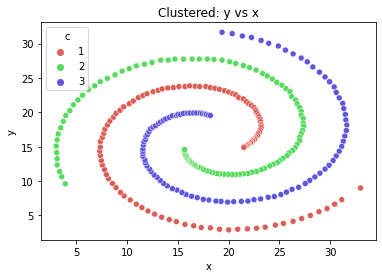

In [43]:
plot(3, "update_1_ip_spiral.txt_output.csv")

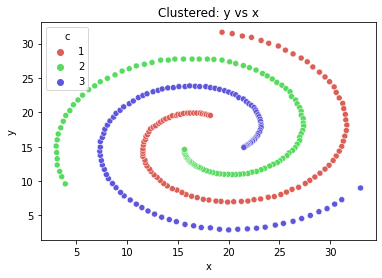

In [44]:
plot(3, "static_new_update_ip_spiral.txt_output.csv")

In [45]:
accuracy("static_new_update_ip_spiral.txt_output.csv", "update_1_ip_spiral.txt_output.csv")

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [46]:
!./a.out ip_spiral.txt 3 1 insert 33 9 


Data fetched successfully!

Eigen values are: 
1 0.999296 0.999314 0.998172 0.997944 0.997853 0.991623 0.993005 0.992761 0.984074 0.983539 0.98241 0.97095 0.97018 0.969447 0.953395 0.952882 0.95421 0.934853 0.932986 0.932602 0.911954 0.907803 0.909274 0.883266 0.883125 0.882135 0.856556 0.854305 0.85515 0.824217 0.823728 0.818216 0.785237 0.786667 0.783441 0.753266 0.749426 0.744315 0.713892 0.71418 0.704755 0.676164 0.667945 0.666168 0.630897 0.636097 0.61577 0.592328 0.599914 0.586411 0.55077 0.544233 0.537782 0.510465 0.507512 0.489934 0.453087 0.460269 0.457012 0.425845 0.426717 -0.676662 0.414598 0.368189 0.377239 0.374781 -0.697668 0.326735 0.334225 0.330854 0.292981 0.288679 0.288333 -0.625082 0.258229 -0.592181 0.242941 0.237181 -0.584112 0.21009 0.212538 -0.566316 0.202526 0.182221 -0.548864 -0.557721 -0.556227 0.167695 0.165054 -0.538354 -0.524897 -0.533815 0.141724 0.140304 -0.520064 0.138019 -0.504361 -0.50838 -0.503173 -0.499975 0.101811 0.101 0.100067 -0.484898 -0.485241

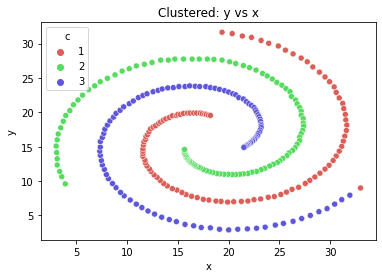

In [47]:
plot(3, "insert_1_ip_spiral.txt_output.csv")

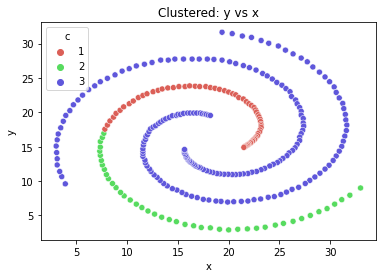

In [48]:
plot(3, "static_new_insert_ip_spiral.txt_output.csv")

In [49]:
accuracy("static_new_insert_ip_spiral.txt_output.csv", "insert_1_ip_spiral.txt_output.csv")

0.5399361022364217


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [50]:
!./a.out ip_spiral.txt 3 1 remove 0 


Data fetched successfully!

Eigen values are: 
1 0.999296 0.999314 0.998172 0.997944 0.997853 0.991623 0.993005 0.992761 0.984074 0.983539 0.98241 0.97095 0.97018 0.969447 0.953395 0.952882 0.95421 0.934853 0.932986 0.932602 0.911954 0.907803 0.909274 0.883266 0.883125 0.882135 0.856556 0.854305 0.85515 0.824217 0.823728 0.818216 0.785237 0.786667 0.783441 0.753266 0.749426 0.744315 0.713892 0.71418 0.704755 0.676164 0.667945 0.666168 0.630897 0.636097 0.61577 0.592328 0.599914 0.586411 0.55077 0.544233 0.537782 0.510465 0.507512 0.489934 0.453087 0.460269 0.457012 0.425845 0.426717 -0.676662 0.414598 0.368189 0.377239 0.374781 -0.697668 0.326735 0.334225 0.330854 0.292981 0.288679 0.288333 -0.625082 0.258229 -0.592181 0.242941 0.237181 -0.584112 0.21009 0.212538 -0.566316 0.202526 0.182221 -0.548864 -0.557721 -0.556227 0.167695 0.165054 -0.538354 -0.524897 -0.533815 0.141724 0.140304 -0.520064 0.138019 -0.504361 -0.50838 -0.503173 -0.499975 0.101811 0.101 0.100067 -0.484898 -0.485241

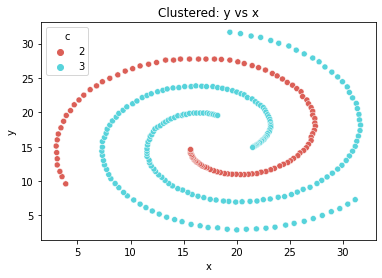

In [51]:
plot(2, "remove_1_ip_spiral.txt_output.csv")

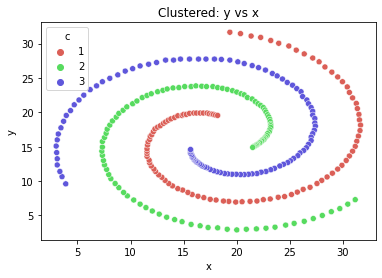

In [52]:
plot(3, "static_new_remove_ip_spiral.txt_output.csv")

In [53]:
accuracy("static_new_remove_ip_spiral.txt_output.csv", "remove_1_ip_spiral.txt_output.csv")

0.6752411575562701


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [54]:
!wget -c http://cs.uef.fi/sipu/datasets/R15.txt

--2021-04-09 10:42:43--  http://cs.uef.fi/sipu/datasets/R15.txt
Resolving cs.uef.fi (cs.uef.fi)... 193.167.239.10
Connecting to cs.uef.fi (cs.uef.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9548 (9.3K) [text/plain]
Saving to: ‘R15.txt’

R15.txt             100%[===================>]   9.32K  --.-KB/s    in 0s      

2021-04-09 10:42:43 (169 MB/s) - ‘R15.txt’ saved [9548/9548]



In [55]:
convert('R15.txt')

In [56]:
!./a.out ip_R15.txt 15 1 update 464 6 14


Data fetched successfully!

Eigen values are: 
0.786443 0.802759 0.554783 0.523433 0.3767 0.355384 0.316916 1 0.999438 0.999608 0.999822 0.999665 0.999725 0.999691 0.99974 0.0803225 0.0779696 0.0737134 0.0686003 0.0659633 0.0635273 0.062537 0.0575101 0.059688 0.0567368 0.0501182 0.0483891 0.0383696 0.0360673 0.0323106 0.0315717 0.0296037 0.0258833 0.0251859 0.0229176 0.0174598 0.0100148 0.00742433 0.00132194 -0.00148069 -0.00204533 -0.00367396 -0.00775017 -0.0080254 -0.0397116 -0.0394755 -0.0371656 -0.036503 -0.0361675 -0.0358267 -0.0356956 -0.0356397 -0.0127437 -0.0128314 -0.012902 -0.0353318 -0.0351713 -0.0348398 -0.0347334 -0.0346743 -0.0340708 -0.0340547 -0.0339088 -0.033767 -0.0337773 -0.0337759 -0.033424 -0.0332261 -0.0331253 -0.0330092 -0.0327854 -0.0327381 -0.0327281 -0.0325642 -0.0324777 -0.0324687 -0.0324014 -0.0322505 -0.0322049 -0.0321283 -0.0320465 -0.0320149 -0.0319371 -0.0319206 -0.031853 -0.03177 -0.0316891 -0.0246078 -0.0245334 -0.0241591 -0.0242824 -0.0237217 -0.0235

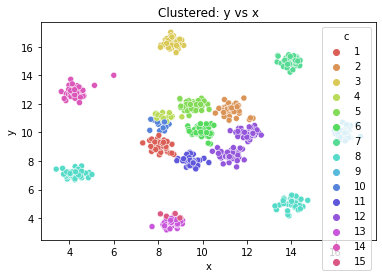

In [60]:
plot(15, "update_1_ip_R15.txt_output.csv")

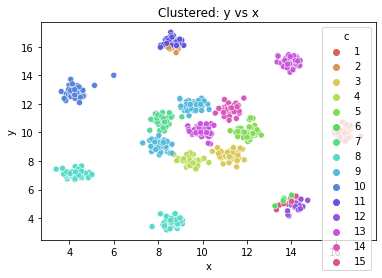

In [61]:
plot(15, "static_new_update_ip_R15.txt_output.csv")

In [62]:
accuracy("static_new_update_ip_R15.txt_output.csv", "update_1_ip_R15.txt_output.csv")

0.6533333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [57]:
!./a.out ip_R15.txt 15 1 insert 6 14


Data fetched successfully!

Eigen values are: 
0.786443 0.802759 0.554783 0.523433 0.3767 0.355384 0.316916 1 0.999438 0.999608 0.999822 0.999665 0.999725 0.999691 0.99974 0.0803225 0.0779696 0.0737134 0.0686003 0.0659633 0.0635273 0.062537 0.0575101 0.059688 0.0567368 0.0501182 0.0483891 0.0383696 0.0360673 0.0323106 0.0315717 0.0296037 0.0258833 0.0251859 0.0229176 0.0174598 0.0100148 0.00742433 0.00132194 -0.00148069 -0.00204533 -0.00367396 -0.00775017 -0.0080254 -0.0397116 -0.0394755 -0.0371656 -0.036503 -0.0361675 -0.0358267 -0.0356956 -0.0356397 -0.0127437 -0.0128314 -0.012902 -0.0353318 -0.0351713 -0.0348398 -0.0347334 -0.0346743 -0.0340708 -0.0340547 -0.0339088 -0.033767 -0.0337773 -0.0337759 -0.033424 -0.0332261 -0.0331253 -0.0330092 -0.0327854 -0.0327381 -0.0327281 -0.0325642 -0.0324777 -0.0324687 -0.0324014 -0.0322505 -0.0322049 -0.0321283 -0.0320465 -0.0320149 -0.0319371 -0.0319206 -0.031853 -0.03177 -0.0316891 -0.0246078 -0.0245334 -0.0241591 -0.0242824 -0.0237217 -0.0235

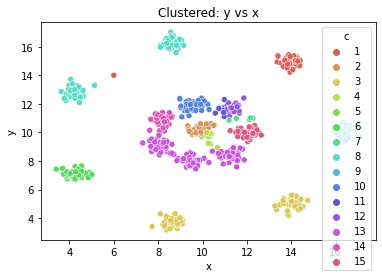

In [63]:
plot(15, "insert_1_ip_R15.txt_output.csv")

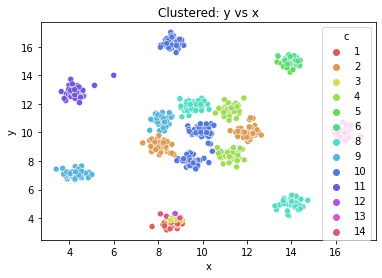

In [67]:
plot(13, "static_new_insert_ip_R15.txt_output.csv")

In [71]:
accuracy("static_new_insert_ip_R15.txt_output.csv", "insert_1_ip_R15.txt_output.csv")

0.519134775374376


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [58]:
!./a.out ip_R15.txt 15 1 remove 479


Data fetched successfully!

Eigen values are: 
0.786443 0.802759 0.554783 0.523433 0.3767 0.355384 0.316916 1 0.999438 0.999608 0.999822 0.999665 0.999725 0.999691 0.99974 0.0803225 0.0779696 0.0737134 0.0686003 0.0659633 0.0635273 0.062537 0.0575101 0.059688 0.0567368 0.0501182 0.0483891 0.0383696 0.0360673 0.0323106 0.0315717 0.0296037 0.0258833 0.0251859 0.0229176 0.0174598 0.0100148 0.00742433 0.00132194 -0.00148069 -0.00204533 -0.00367396 -0.00775017 -0.0080254 -0.0397116 -0.0394755 -0.0371656 -0.036503 -0.0361675 -0.0358267 -0.0356956 -0.0356397 -0.0127437 -0.0128314 -0.012902 -0.0353318 -0.0351713 -0.0348398 -0.0347334 -0.0346743 -0.0340708 -0.0340547 -0.0339088 -0.033767 -0.0337773 -0.0337759 -0.033424 -0.0332261 -0.0331253 -0.0330092 -0.0327854 -0.0327381 -0.0327281 -0.0325642 -0.0324777 -0.0324687 -0.0324014 -0.0322505 -0.0322049 -0.0321283 -0.0320465 -0.0320149 -0.0319371 -0.0319206 -0.031853 -0.03177 -0.0316891 -0.0246078 -0.0245334 -0.0241591 -0.0242824 -0.0237217 -0.0235

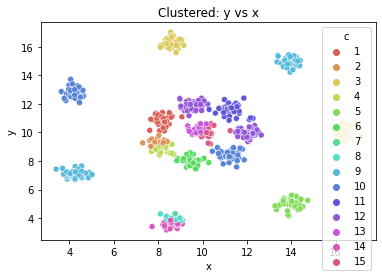

In [68]:
plot(15, "remove_1_ip_R15.txt_output.csv")

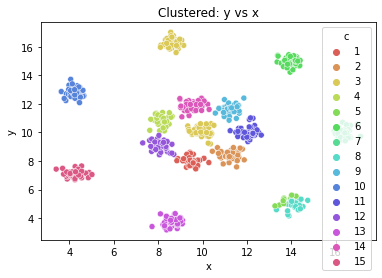

In [69]:
plot(15, "static_new_remove_ip_R15.txt_output.csv")

In [70]:
accuracy("static_new_remove_ip_R15.txt_output.csv", "remove_1_ip_R15.txt_output.csv")

0.6243739565943238


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [72]:
!wget -c http://cs.uef.fi/sipu/datasets/pathbased.txt

--2021-04-09 12:43:31--  http://cs.uef.fi/sipu/datasets/pathbased.txt
Resolving cs.uef.fi (cs.uef.fi)... 193.167.239.10
Connecting to cs.uef.fi (cs.uef.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4085 (4.0K) [text/plain]
Saving to: ‘pathbased.txt’

pathbased.txt       100%[===================>]   3.99K  --.-KB/s    in 0s      

2021-04-09 12:43:31 (703 MB/s) - ‘pathbased.txt’ saved [4085/4085]



In [73]:
convert('pathbased.txt')

In [74]:
!./a.out ip_pathbased.txt 3 1 update 270 15 25


Data fetched successfully!

Eigen values are: 
1 0.999048 0.996548 0.986977 0.990718 0.990658 0.975098 0.961476 0.952555 0.93549 0.922183 0.9153 0.904235 0.899992 0.881822 0.872683 0.876599 0.867318 0.833821 0.827673 0.819271 0.809117 0.78469 0.76814 0.753122 0.735198 0.732462 0.710793 0.681868 0.675061 0.66742 0.655661 0.632437 0.621914 0.605153 -0.679196 0.56772 0.559935 0.545175 0.544318 0.534947 0.532039 -0.663889 0.50962 0.503982 0.486998 0.476461 0.467912 0.444488 -0.595577 0.419464 0.412948 0.3953 0.370785 0.352177 0.342412 0.345388 0.333094 0.333882 0.295616 0.283223 0.267844 0.239494 0.233452 0.22211 0.215574 0.211426 0.206262 -0.499348 0.18203 0.16292 0.15346 0.15137 0.140031 0.137647 -0.474612 0.123504 0.125311 0.11858 0.110394 0.104626 -0.450574 -0.454369 -0.451742 -0.447723 0.0904586 -0.436717 -0.443999 -0.433921 0.0756811 0.0746796 -0.426627 -0.426942 0.0684337 -0.4238 0.067456 -0.418775 0.0640827 -0.413709 -0.409987 0.0606516 -0.410605 -0.407673 -0.405001 -0.402192 -0.4

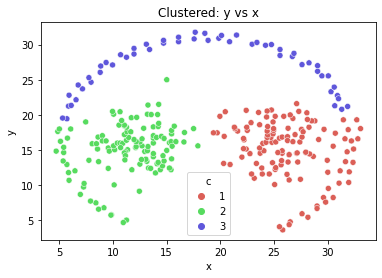

In [76]:
plot(3, "update_1_ip_pathbased.txt_output.csv")

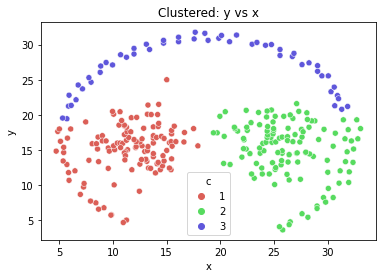

In [77]:
plot(3, "static_new_update_ip_pathbased.txt_output.csv")

In [83]:
accuracy("static_new_update_ip_pathbased.txt_output.csv", "update_1_ip_pathbased.txt_output.csv")

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [75]:
!./a.out ip_pathbased.txt 3 1 insert 15 25


Data fetched successfully!

Eigen values are: 
1 0.999048 0.996548 0.986977 0.990718 0.990658 0.975098 0.961476 0.952555 0.93549 0.922183 0.9153 0.904235 0.899992 0.881822 0.872683 0.876599 0.867318 0.833821 0.827673 0.819271 0.809117 0.78469 0.76814 0.753122 0.735198 0.732462 0.710793 0.681868 0.675061 0.66742 0.655661 0.632437 0.621914 0.605153 -0.679196 0.56772 0.559935 0.545175 0.544318 0.534947 0.532039 -0.663889 0.50962 0.503982 0.486998 0.476461 0.467912 0.444488 -0.595577 0.419464 0.412948 0.3953 0.370785 0.352177 0.342412 0.345388 0.333094 0.333882 0.295616 0.283223 0.267844 0.239494 0.233452 0.22211 0.215574 0.211426 0.206262 -0.499348 0.18203 0.16292 0.15346 0.15137 0.140031 0.137647 -0.474612 0.123504 0.125311 0.11858 0.110394 0.104626 -0.450574 -0.454369 -0.451742 -0.447723 0.0904586 -0.436717 -0.443999 -0.433921 0.0756811 0.0746796 -0.426627 -0.426942 0.0684337 -0.4238 0.067456 -0.418775 0.0640827 -0.413709 -0.409987 0.0606516 -0.410605 -0.407673 -0.405001 -0.402192 -0.4

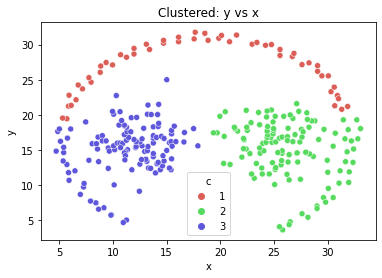

In [78]:
plot(3, "insert_1_ip_pathbased.txt_output.csv")

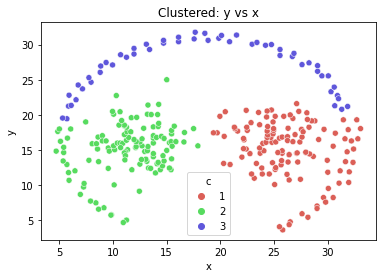

In [79]:
plot(3, "static_new_insert_ip_pathbased.txt_output.csv")

In [84]:
accuracy("static_new_insert_ip_pathbased.txt_output.csv", "insert_1_ip_pathbased.txt_output.csv")

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [80]:
!./a.out ip_pathbased.txt 3 1 remove 270


Data fetched successfully!

Eigen values are: 
1 0.999048 0.996548 0.986977 0.990718 0.990658 0.975098 0.961476 0.952555 0.93549 0.922183 0.9153 0.904235 0.899992 0.881822 0.872683 0.876599 0.867318 0.833821 0.827673 0.819271 0.809117 0.78469 0.76814 0.753122 0.735198 0.732462 0.710793 0.681868 0.675061 0.66742 0.655661 0.632437 0.621914 0.605153 -0.679196 0.56772 0.559935 0.545175 0.544318 0.534947 0.532039 -0.663889 0.50962 0.503982 0.486998 0.476461 0.467912 0.444488 -0.595577 0.419464 0.412948 0.3953 0.370785 0.352177 0.342412 0.345388 0.333094 0.333882 0.295616 0.283223 0.267844 0.239494 0.233452 0.22211 0.215574 0.211426 0.206262 -0.499348 0.18203 0.16292 0.15346 0.15137 0.140031 0.137647 -0.474612 0.123504 0.125311 0.11858 0.110394 0.104626 -0.450574 -0.454369 -0.451742 -0.447723 0.0904586 -0.436717 -0.443999 -0.433921 0.0756811 0.0746796 -0.426627 -0.426942 0.0684337 -0.4238 0.067456 -0.418775 0.0640827 -0.413709 -0.409987 0.0606516 -0.410605 -0.407673 -0.405001 -0.402192 -0.4

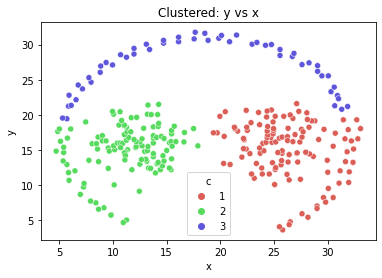

In [81]:
plot(3, "remove_1_ip_pathbased.txt_output.csv")

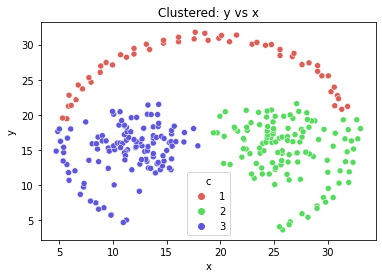

In [82]:
plot(3, "static_new_remove_ip_pathbased.txt_output.csv")

In [85]:
accuracy("static_new_remove_ip_pathbased.txt_output.csv", "remove_1_ip_pathbased.txt_output.csv")

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
